In [1]:
import numpy as np
import matplotlib.pyplot as plt

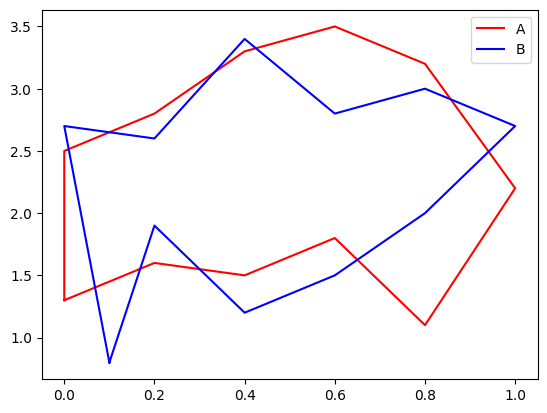

In [21]:
A = np.array(
    [
        [0.0, 1.3], [0.2, 1.6], [0.4, 1.5], [0.6, 1.8], [0.8, 1.1], [1.0, 2.2],
        [0.8, 3.2], [0.6, 3.5], [0.4, 3.3], [0.2, 2.8], [0.0, 2.5],
    ]
)

B = np.array(
    [
        [0.1, 0.8], [0.2, 1.9], [0.4, 1.2], [0.6, 1.5], [0.8, 2.0], [1.0, 2.7],
        [0.8, 3.0], [0.6, 2.8], [0.4, 3.4], [0.2, 2.6], [0.0, 2.7],
    ]
)

# Add final point to both A and B for plotting closed polygon
A_closed = np.vstack([A, A[0]])
B_closed = np.vstack([B, B[0]])

# Plot the polygons
plt.plot(A_closed[:, 0], A_closed[:, 1], 'r-', label='A')
plt.plot(B_closed[:, 0], B_closed[:, 1], 'b-', label='B')
plt.legend()

A_len:  [0.36055513 0.2236068  0.36055513 0.72801099 1.11803399 1.0198039
 0.36055513 0.28284271 0.53851648 0.36055513 1.2       ]
B_len:  [1.1045361  0.72801099 0.36055513 0.53851648 0.72801099 0.36055513
 0.28284271 0.63245553 0.82462113 0.2236068  1.90262976]
A_perc:  [0.         0.05502109 0.08914372 0.1441648  0.25526004 0.42587318
 0.58149632 0.6365174  0.67967949 0.76185767 0.81687875 1.        ]
B_perc:  [0.         0.14370116 0.23841606 0.28532462 0.35538611 0.450101
 0.49700956 0.53380766 0.6160907  0.72337467 0.75246612 1.        ]
A_idx -1
pt 0.0
A_min_perc 1.0000000000000002
A_max_perc 0.0
A % diff -1.0000000000000002
A2 % diff -1.0000000000000002
A frac 1.0
Total A len 1.2
A_pt_len:  1.2
A_idx 0
pt 0.010101010101010102
A_min_perc 0.0
A_max_perc 0.05502108664988754
A % diff 0.010101010101010102
A2 % diff 0.05502108664988754
A frac 0.18358434404040885
Total A len 0.36055512754639896
A_pt_len:  0.06619227658101161
A_idx 0
pt 0.020202020202020204
A_min_perc 0.0
A_max_perc 0.0

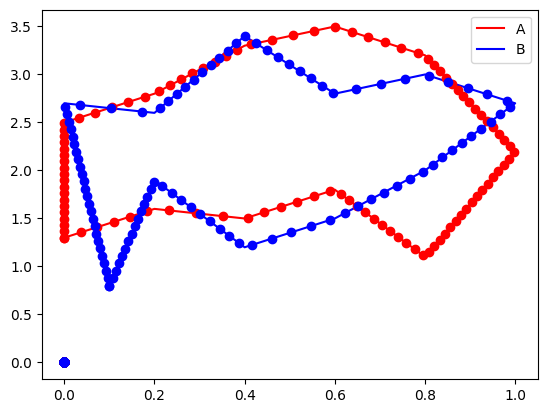

In [67]:
def compute_polygon_combination(A, B, A_wgt=0.5, B_wgt=0.5):
    # Roll the vector (move elements to the left) to find the next point
    A_next = np.roll(A, -1, axis=0)
    B_next = np.roll(B, -1, axis=0)
    
    # Find lengths to next point
    A_len = np.linalg.norm(A_next - A, axis=1)
    B_len = np.linalg.norm(B_next - B, axis=1)
    print("A_len: ", A_len)
    print("B_len: ", B_len)
    
    # Find the heading for each point
    A_head = np.arctan2(A_next[:, 1] - A[:, 1], A_next[:, 0] - A[:, 0])
    B_head = np.arctan2(B_next[:, 1] - B[:, 1], B_next[:, 0] - B[:, 0])
    # print("A_head: ", A_head)
    # print("B_head: ", B_head)
    
    # Find percentage distance around polygon for each point
    A_perc = np.cumsum(A_len) / np.sum(A_len)
    B_perc = np.cumsum(B_len) / np.sum(B_len)
    
    # Insert a 0 at the start of the percentage array to make the first point 0%
    A_perc = np.insert(A_perc, 0, 0)
    B_perc = np.insert(B_perc, 0, 0)
    
    print("A_perc: ", A_perc)
    print("B_perc: ", B_perc)
    
    # Create output points for final polygon
    pts = np.linspace(0, 1, 100)
    
    # Create output arrays for A and B closest points to each percentage
    A_pts = np.zeros((len(pts), 2))
    B_pts = np.zeros((len(pts), 2))
    
    for pt in pts:
        # Find the index of the line which the point is on
        A_idx = np.argmin(pt > A_perc) - 1
        B_idx = np.argmin(pt > B_perc) - 1
        
        # print("pt >= A_perc: ", pt >= A_perc)
        # print("pt >= B_perc: ", pt >= B_perc)
        # print("pt: ", pt, "A_idx: ", A_idx, "B_idx: ", B_idx)
        print("A_idx", A_idx)
        # print("B_idx", B_idx)
        print("pt", pt)
        
        print("A_min_perc", A_perc[A_idx])
        # print("B_min_perc", B_perc[B_idx])
        
        print("A_max_perc", A_perc[A_idx + 1])
        # print("B_max_perc", B_perc[B_idx + 1])
        
        print("A % diff", pt - A_perc[A_idx])
        # print("B % diff", pt - B_perc[B_idx])
        
        print("A2 % diff", A_perc[A_idx + 1] - A_perc[A_idx])
        # print("B2 % diff", B_perc[B_idx + 1] - B_perc[B_idx])
        
        print("A frac", (pt - A_perc[A_idx]) / (A_perc[A_idx + 1] - A_perc[A_idx]))
        # print("B frac", (pt - B_perc[B_idx]) / (B_perc[B_idx + 1] - B_perc[B_idx]))
        
        print("Total A len", A_len[A_idx])
        # print("Total B len", B_len[B_idx])
        
        # Find the length of the line from this point to polygon last point
        A_pt_len = ((pt - A_perc[A_idx]) / (A_perc[A_idx + 1] - A_perc[A_idx])) * A_len[A_idx]
        B_pt_len = ((pt - B_perc[B_idx]) / (B_perc[B_idx + 1] - B_perc[B_idx])) * B_len[B_idx]
        
        print("A_pt_len: ", A_pt_len)
        # print("B_pt_len: ", B_pt_len)
        
        # Find the point on the line and add to output array
        A_pts = np.vstack((A_pts, A[A_idx] + np.array([A_pt_len * np.cos(A_head[A_idx]), A_pt_len * np.sin(A_head[A_idx])])))
        B_pts = np.vstack((B_pts, B[B_idx] + np.array([B_pt_len * np.cos(B_head[B_idx]), B_pt_len * np.sin(B_head[B_idx])])))
    
    print("A_pts: ", A_pts)
    print("B_pts: ", B_pts)
    
    # Plot the polygons
    plt.plot(A_closed[:, 0], A_closed[:, 1], 'r-', label='A')
    plt.plot(B_closed[:, 0], B_closed[:, 1], 'b-', label='B')
    plt.plot(A_pts[:, 0], A_pts[:, 1], 'ro')
    plt.plot(B_pts[:, 0], B_pts[:, 1], 'bo')
    plt.legend()
    
compute_polygon_combination(A, B)